In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Useful Librairies**

In [ ]:
#we use pandas to manipulate dataset as frame
import pandas as pd
#We use numpy for matricial operation
import numpy as np
#matplotlib and seaborn for plotting 
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn is a ml lib that allows easily processing ml algorithsms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

## Importation de la base

In [ ]:
df = pd.read_csv('/content/sample_data/aims_house_data.csv')

FileNotFoundError: ignored

## Visualisation de la base


In [ ]:
df.drop("id", axis = 1, inplace = True)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 20)

Nous avons 21613 observations et 21 features 

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Le prix de loyer est égale en moyenne à : 5.400881e+05

La prix de loyer minimum est de 7.500000e+04

max  price est de    7.700000e+06

In [ ]:
# Regardons si notre base contient des missing values
df.isna().sum()

NameError: ignored

Nous constatons que dans cette base y'a pas de données manquantes

# Question 1

Pour avoir une meilleure idée du prix du loyer en fonction de la surface (surface_home), afficher le
graphique en forme de nuage de point représentant le montant du loyer en fonction de la surface.

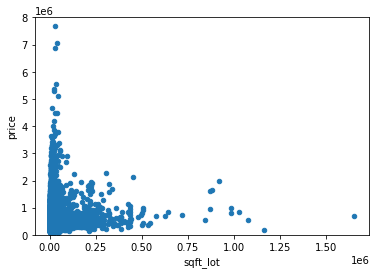

In [ ]:

var_x = 'sqft_lot'
var_y='price'
data = pd.concat([df[var_y], df[var_x]], axis=1)
data.plot.scatter(x=var_x, y=var_y, ylim=(0,8000000 ))

# Question 2

Clairement, d'après la visualisation, que pouvez-vous donc émettre comme hypothèse h θ (x) de
modélisation du phénomène surface par rapport au prix ?

**D'aprés la visualisation du graphe précédent on peut dire qu'il n'y a pas de corrélation forte entre le prix et la surface_home**

# Question 3

A l’aide de la solution de l'équation de minimisation
trouver la valeur des
paramètres
qui se rapprochent le mieux aux données d’entrainement.

In [ ]:
var_x = 'sqft_lot'
var_y='price'
df1 = pd.concat([df[var_y], df[var_x]], axis=1)

In [ ]:
df1.head()

,price,sqft_lot
0,221900.0,5650
1,538000.0,7242
2,180000.0,10000
3,604000.0,5000
4,510000.0,8080


In [ ]:
df1.shape

(21613, 2)

In [ ]:

df1_train, df1_test = train_test_split(df1, train_size=0.8, test_size=0.2)

In [ ]:
print("size of the training set", df1_train.shape)
print("size of the testing set", df1_test.shape)

size of the training set (17290, 2)
size of the testing set (4323, 2)


In [ ]:
## Préparation des données

In [ ]:
#prepare data
x_train = df1_train['sqft_lot']
y_train = df1_train['price']
x_test = df1_test['sqft_lot']
y_test = df1_test['price']

#We transform the data as matrix because ML algorithms works well with matricial dot product information
#We transform the dataframe to matrix
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
#We reshape our data to apply Linear Regression formula, then we call Linear Regression function from Sckit-Learn library and predict our data.

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

**Equation de normalisation**

In [ ]:
n=len(x_train)
x=np.array([np.ones(n), df1_train['sqft_lot'].values]).T
y=y_train
theta=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta

array([5.27815862e+05, 8.56852868e-01])

# Question 04

Remplacer les valeurs des paramètres
dans l’hypothèse h θ (x) et représenter graphiquement
la droite qu'on a trouvée, pour vérifier qu'elle colle bien aux données.

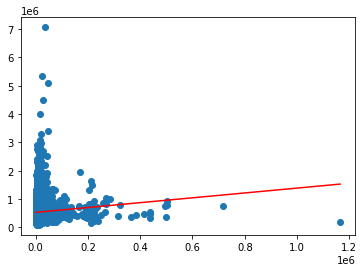

In [ ]:
# Making predictions
y_pred = theta[1]*x_test + theta[0]

plt.scatter(x_test, y_test)
plt.plot([min(x_test), max(x_test)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()

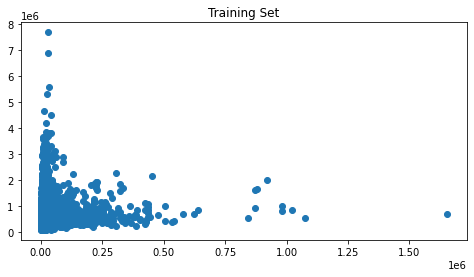

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline

#plot the training data
plt.figure(figsize=(8,4))
plt.title("Training Set")
plt.scatter(x_train,y_train)

# Question 5 

Maintenant qu’on a le paramètre optimal θ, utilisez le modèle pour effectuer des prédictions du loyer
pour une surface de 5400 m 2 et 12500 m 2 .

In [ ]:
# pour x = 5400
y_pred_1 = theta[1]*5400 + theta[0]
# pour x = 12500
y_pred_2 = theta[1]*12500 + theta[0]
print (y_pred_1)
print (y_pred_2)

532442.8679706369
538526.5233355009


# Question 6

Utilisez la fonction linear_model disponible dans package scikit-learn pour trouver la valeur des
paramètres
.

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
theta0=model.intercept_
theta1=model.coef_
print("The learning model h(x)=",round(theta0,2),"+",round(theta1[0],2),"x1")

The learning model h(x)= 527815.86 + 0.86 x1


# II / Partie 2

# Question 2


```

```



Utilisez la fonction linear_model disponible dans package scikit-learn pour trouver la valeur des
paramètres θ = (θ 0 , θ 1 , θ 2 , θ 3 , θ 4 , θ 5 , θ 6 , θ 7 , θ 8 , θ 9 , θ 10 , θ 11 , θ 12 ).

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2)

In [ ]:
print("size of the training set", df_train.shape)
print("size of the testing set", df_test.shape)

size of the training set (17290, 20)
size of the testing set (4323, 20)


In [ ]:
x0=np.ones(df_train.shape[0]) # is the bias feature (we fix to one by default)
x1=df_train['bedrooms'] #feature 1
x2=df_train['bathrooms'] #feature 2
x3=df_train['sqft_living'] #feature 3
x4=df_train['sqft_lot'] # feature 4
x5=df_train['floors']  # feature 5
x6=df_train['waterfront'] # feature  6
x7=df_train['view'] # feature 7
x8=df_train['condition'] # feature 8
x9=df_train['grade'] # feature 9
x10=df_train['yr_built'] # feature 10
x11=df_train['yr_renovated'] # feature 11

#'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors' , 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'




In [ ]:
y=df_train['price'] #target


#we create a matrix from the four features
x_train=np.array([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]).transpose()
y_train=np.array(y)
print(x_train.shape)
print(y_train.shape)

(17290, 12)
(17290,)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.00000000e+00, -3.84835593e+04,  4.79312456e+04,  1.69927920e+02,
       -2.55140354e-01,  2.61325826e+04,  5.60193791e+05,  4.77212366e+04,
        1.93626244e+04,  1.23837462e+05, -3.66811390e+03,  4.41608182e+00])

# Question 1

A l’aide de la solution de l'équation de minimisation
trouver les valeurs de θ
optimal qui se rapprochent le mieux aux données d’entrainement tel que
θ = (θ 0 , θ 1 , θ 2 , θ 3 , θ 4 , θ 5 , θ 6 , θ 7 , θ 8 , θ 9 , θ 10 , θ 11 , θ 12 ).

**Préparation des données**

In [ ]:
df_train.head()
df_train.shape

(17290, 20)

In [ ]:

x1=df_train['bedrooms'] #feature 1
x2=df_train['bathrooms'] #feature 2
x3=df_train['sqft_living'] #feature 3
x4=df_train['sqft_lot'] # feature 4
x5=df_train['floors']  # feature 5
x6=df_train['waterfront'] # feature  6
x7=df_train['view'] # feature 7
x8=df_train['condition'] # feature 8
x9=df_train['grade'] # feature 9
x10=df_train['yr_built'] # feature 10
x11=df_train['yr_renovated'] # feature 11

In [ ]:


x1_=df_test['bedrooms'] #feature 1
x2_=df_test['bathrooms'] #feature 2
x3_=df_test['sqft_living'] #feature 3
x4_=df_test['sqft_lot'] # feature 4
x5_=df_test['floors']  # feature 5
x6_=df_test['waterfront'] # feature  6
x7_=df_test['view'] # feature 7
x8_=df_test['condition'] # feature 8
x9_=df_test['grade'] # feature 9
x10_=df_test['yr_built'] # feature 10
x11_=df_test['yr_renovated'] # feature 11

In [ ]:
y_train = df_train['price']
y_test = df_test['price']

In [ ]:
#We transform the data as matrix because ML algorithms works well with matricial dot product information
#We transform the dataframe to matrix
x_train = np.array([ x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11])
x_test  = np.array([x0, x1_, x2_, x3_, x4_, x5_, x6_, x7_, x8_, x9_, x10_, x11_])
y_train = np.array(y_train)
y_test  = np.array(y_test)

#We reshape our data to apply Linear Regression formula, then we call Linear Regression function from Sckit-Learn library and predict our data.

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
x_train = np.array([ x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11])
x_train.shape

(11, 17290)

In [ ]:
#n=len(x_train)
x1=np.array([np.ones(df_train.shape[0]), df_train['bathrooms'].values]).T
x2=np.array([np.ones(df_train.shape[0]), df_train['bedrooms'].values]).T
x3=np.array([np.ones(df_train.shape[0]), df_train['sqft_living'].values]).T
x4=np.array([np.ones(df_train.shape[0]), df_train['sqft_lot'].values]).T
x5=np.array([np.ones(df_train.shape[0]), df_train['floors'].values]).T
x6=np.array([np.ones(df_train.shape[0]), df_train['waterfront'].values]).T
x7=np.array([np.ones(df_train.shape[0]), df_train['view'].values]).T
x8=np.array([np.ones(df_train.shape[0]), df_train['condition'].values]).T
x9=np.array([np.ones(df_train.shape[0]), df_train['grade'].values]).T
x10=np.array([np.ones(df_train.shape[0]), df_train['yr_built'].values]).T
x11=np.array([np.ones(df_train.shape[0]), df_train['yr_renovated'].values]).T





y = y_train



In [ ]:
theta1 = np.linalg.inv(x1.T.dot(x1)).dot(x1.T).dot(y)
theta2 = np.linalg.inv(x2.T.dot(x1)).dot(x2.T).dot(y)
theta3 = np.linalg.inv(x3.T.dot(x1)).dot(x3.T).dot(y)
theta4 = np.linalg.inv(x4.T.dot(x1)).dot(x4.T).dot(y)
theta5 = np.linalg.inv(x5.T.dot(x1)).dot(x5.T).dot(y)
theta6 = np.linalg.inv(x6.T.dot(x1)).dot(x6.T).dot(y)
theta7 = np.linalg.inv(x7.T.dot(x1)).dot(x7.T).dot(y)
theta8 = np.linalg.inv(x8.T.dot(x1)).dot(x8.T).dot(y)
theta9 = np.linalg.inv(x9.T.dot(x1)).dot(x9.T).dot(y)
theta10 = np.linalg.inv(x10.T.dot(x1)).dot(x10.T).dot(y)
theta11 = np.linalg.inv(x11.T.dot(x1)).dot(x11.T).dot(y)
print(theta1)
print(theta2)
print(theta3)
print(theta4)
print(theta5)
print(theta6)
print(theta7)
print(theta8)
print(theta9)
print(theta10)
print(theta11)

[ 10015.44587368 251519.22230246]
[-61830.58457723 285569.14703288]
[-398411.26652177  445084.52754864]
[-491418.49086556  489163.35790872]
[ 28286.35875914 242860.10495664]
[-3463705.06756158  1897816.46760109]
[-1541899.87691043   987017.05839912]
[ 887233.63007167 -164220.00443885]
[-471754.44432513  479843.99398013]
[450219.06132938  42893.91790842]
[-2068580.92967783  1236626.53704554]


In [ ]:
x0=np.ones(df_train.shape[0])

In [ ]:
x0

array([1., 1., 1., ..., 1., 1., 1.])